In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age_Range,Head_Size,Brain_Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
df['Age_Range'].unique()

array([1, 2])

In [4]:
grouped = df.groupby(df['Age_Range']) 
df_new = grouped.get_group(1) 
df_new 

,Gender,Age_Range,Head_Size,Brain_Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
182,2,1,4005,1280
183,2,1,3181,1175
184,2,1,3479,1160
185,2,1,3642,1205


In [5]:
df.columns

Index(['Gender', 'Age_Range', 'Head_Size', 'Brain_Weight'], dtype='object')

In [6]:
df.isnull().sum()

Gender          0
Age_Range       0
Head_Size       0
Brain_Weight    0
dtype: int64

In [7]:
df.describe()

,Gender,Age_Range,Head_Size,Brain_Weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


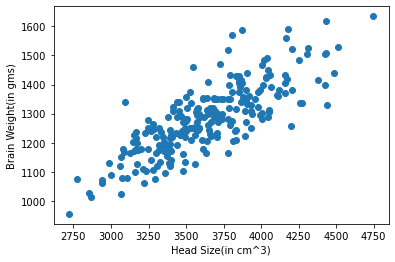

In [8]:
plt.scatter(df.Head_Size,df.Brain_Weight)
plt.ylabel('Brain Weight(in gms)')
plt.xlabel('Head Size(in cm^3)')
plt.show()

In [9]:
X = df['Head_Size'].values
Y = df['Brain_Weight'].values

mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

num =0
denom = 0

for i in range(n):
    num += (X[i]-mean_X)* (Y[i]-mean_Y)
    denom +=(X[i]-mean_X)**2
m = num/denom
c = mean_Y - (m*mean_X)

print(m,',',c)

0.26342933948939945 , 325.57342104944223


In [10]:
min_x = np.min(X) - 100
max_x = np.max(X) + 100

In [11]:
x = np.linspace(min_x,max_x,1000)
y = m*x + c

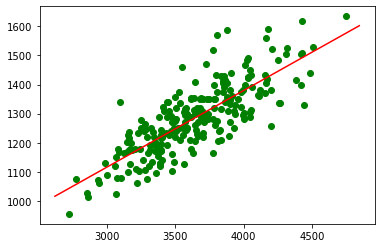

In [12]:
plt.plot(x,y,color="r")
plt.scatter(X,Y,color="g")
plt.show()

In [13]:
sum_pred = 0
sum_act = 0

for i in range(n):
    y_pred = (m*X[i]+c)
    sum_pred += (Y[i]-y_pred)**2
    sum_act +=(Y[i]-mean_Y)**2

r2 = 1-(sum_pred/sum_act)
print(r2)

0.6393117199570003


* Here we can observe that we got R**2> 0.5 . so we have good model

In [14]:
def predict(x):
    y = (m*x) + c
    print(y)

In [15]:
predict(3233)

1177.2404756186706
